# Effects of Delay Types and Time on Arrival Flight Delays
## by Christine Howard

## Investigation Overview

> I will be investigating various factors to analyze their effect on arrival flight delays in 2005. I will focus my analysis around the delay reasons given in the dataset (carrier delay, weather delay, nas delay, security delay, and late aircraft delay), as well as measures of time (day of the week and month of the year)in order to see what factors contribute towards arrival delays.

## Dataset Overview

> I will be working with the Flights dataset, which looks at millions of flights over nearly 2 decades and provides delayed information for each flight. The dataset is focused around flight delays.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_1990 = pd.read_csv('1990.csv')
df_2005 = pd.read_csv('2005.csv')

In [6]:
df_1990_clean = df_1990.copy()
df_2005_clean = df_2005.copy()
df_2005_clean.drop_duplicates(inplace=True) # dropping duplicates

In [7]:
# drop rows where values in Cancelled column are 1, meaning flights were canceled.
df_1990_clean.drop(df_1990_clean[df_1990_clean.Cancelled == 1].index, inplace=True)
df_2005_clean.drop(df_2005_clean[df_2005_clean.Cancelled == 1].index, inplace=True)

In [8]:
columns_to_drop = ['FlightNum', 'TailNum', 'Cancelled', 'CancellationCode']
df_1990_clean = df_1990_clean.drop(columns_to_drop, axis=1)
columns_to_drop = ['FlightNum', 'TailNum', 'Cancelled', 'CancellationCode']
df_2005_clean = df_2005_clean.drop(columns_to_drop, axis=1)

In [9]:
# I found an intersection function I will use to delete columns in which both the departures/arrivals columns had values <= 0
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

arrival_notdelayed = df_2005_clean[df_2005_clean.ArrDelay <= 0].index
# find the index of all of the rows in ArrDelay column that are <= 0
departure_notdelayed = df_2005_clean[df_2005_clean.DepDelay <= 0].index
# find the index of all of the rows in DepDelay column that are <= 0

df_2005_clean_delayed = df_2005_clean.drop(intersection(arrival_notdelayed, departure_notdelayed))
# I match the ones that have in both the ArrDelay and DepDelay columns values <= 0.
# this means that these flights departed and arrived either early, or on time, and neither the arrival nor departure were delayed.
# I found an intersection function I will use to delete columns in which both the departures/arrivals columns had values <= 0
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

arrival_notdelayed = df_2005_clean[df_2005_clean.ArrDelay <= 0].index
# find the index of all of the rows in ArrDelay column that are <= 0
departure_notdelayed = df_2005_clean[df_2005_clean.DepDelay <= 0].index
# find the index of all of the rows in DepDelay column that are <= 0

df_2005_clean_delayed = df_2005_clean.drop(intersection(arrival_notdelayed, departure_notdelayed))
# I match the ones that have in both the ArrDelay and DepDelay columns values <= 0.
# this means that these flights departed and arrived either early, or on time, and neither the arrival nor departure were delayed.
df_2005_clean_delayed[['ArrDelay', 'DepDelay']].reset_index(drop=True)
# the first 4 rows in the df_2005_clean had negative values in both columns originally
# I can check the new head for these columns to see if there are still negative values
# I also want to reset index so that I do not hold on to the old row indexes

,ArrDelay,DepDelay
0,3.0,34.0
1,97.0,102.0
2,85.0,106.0
3,105.0,130.0
4,12.0,-1.0
...,...,...
3601825,3.0,0.0
3601826,10.0,8.0
3601827,6.0,-1.0
3601828,10.0,0.0


In [10]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

arrival_notdelayed = df_1990_clean[df_1990_clean.ArrDelay <= 0].index
departure_notdelayed = df_1990_clean[df_1990_clean.DepDelay <= 0].index

df_1990_clean_delayed = df_1990_clean.drop(intersection(arrival_notdelayed, departure_notdelayed))
df_1990_clean_delayed[['ArrDelay', 'DepDelay']].reset_index(drop=True)

,ArrDelay,DepDelay
0,32.0,37.0
1,44.0,36.0
2,-5.0,3.0
3,3.0,0.0
4,55.0,64.0
...,...,...
3307375,17.0,23.0
3307376,13.0,22.0
3307377,32.0,39.0
3307378,-1.0,17.0


In [11]:
df_1990_clean_delayed.rename(columns=lambda x: x.lower(), inplace=True) 
# I use a lambda function to make all column names lowercase, in place

In [12]:
df_2005_clean_delayed.rename(columns=lambda x: x.lower(), inplace=True) # I'll repeat the process for the other df
# now I will rename the columns to make them more descriptive/easier to type and remember
df_1990_clean_delayed.rename(columns={'dayofmonth': 'day_of_month', 'dayofweek': 'day_of_week', 'deptime': 'departure_time',
                                     'crsdeptime': 'scheduled_dep_time', 'arrtime': 'arrival_time', 
                                     'crsarrtime': 'scheduled_arr_time', 'uniquecarrier': 'carrier', 
                                      'actualelapsedtime': 'actual_elapsed_time', 'crselapsedtime': 'scheduled_elapsed_time',
                                      'arrdelay': 'arrival_delay', 'depdelay': 'departure_delay', 'dest': 'destination',
                                      'taxiin': 'taxi_in', 'taxiout': 'taxi_out', 'carrierdelay': 'carrier_delay',
                                      'weatherdelay': 'weather_delay', 'nasdelay': 'nas_delay', 'securitydelay': 'security_delay',
                                      'lateaircraftdelay' : 'late_aircraft_delay'}, inplace=True)

# repeating this for the other df
df_2005_clean_delayed.rename(columns={'dayofmonth': 'day_of_month', 'dayofweek': 'day_of_week', 'deptime': 'departure_time',
                                     'crsdeptime': 'scheduled_dep_time', 'arrtime': 'arrival_time', 
                                     'crsarrtime': 'scheduled_arr_time', 'uniquecarrier': 'carrier', 
                                      'actualelapsedtime': 'actual_elapsed_time', 'crselapsedtime': 'scheduled_elapsed_time',
                                      'arrdelay': 'arrival_delay', 'depdelay': 'departure_delay', 'dest': 'destination',
                                      'taxiin': 'taxi_in', 'taxiout': 'taxi_out', 'carrierdelay': 'carrier_delay',
                                      'weatherdelay': 'weather_delay', 'nasdelay': 'nas_delay', 'securitydelay': 'security_delay',
                                      'lateaircraftdelay' : 'late_aircraft_delay'}, inplace=True)

In [13]:
df_2005_clean_delayed_arrival = df_2005_clean_delayed[df_2005_clean_delayed['arrival_delay'] > 0]
df_2005_clean_delayed_departure = df_2005_clean_delayed[df_2005_clean_delayed['departure_delay'] > 0]
# this will give me 2 new dfs: 1 with flights that had arrival delays, and 1 only with flights that had departure delays.
# many of flights will likely exist in both dfs.

df_2005_clean_delayed_arrival.reset_index(drop=True, inplace=True) # reset indexes for new dfs
df_2005_clean_delayed_departure.reset_index(drop=True, inplace=True)

## Total arrival delays for different reasons

> The delay type with the most delays is an NAS delay. An NAS delay is defined as: "Delays and cancellations attributable to the National Aviation System (NAS) that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control."<br><br>
This kind of delay covers a wide range of different delays, and it makes sense then that this delay would then have the highest count of delays. NAS delays appear to delay arrivals significantly more often than departures, and I could imagine this is likely due to planes needing to be delayed in the air for reasons like unsafe landing conditions due to weather, no place for the plane to land due to traffice, and so on.

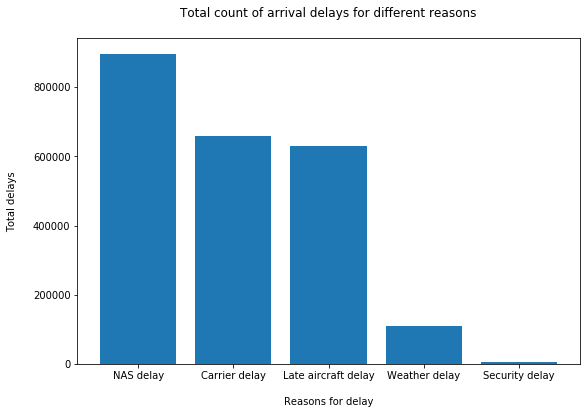

In [20]:
# first, I will find the counts for each delay reason. 
# I will filter out minutes of delay not greater than 0, as this would indicate this did not cause the flight to be delayed.

carrier_count = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].count()
weather_count = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].count()
nas_count = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].count()
security_count = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].count()
late_count = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].count()

locations = [0, 1, 2, 3, 4]
heights = sorted([carrier_count, weather_count, nas_count, security_count,late_count], reverse=True)
# using counts above as heights for bars
width = 9 # labels are long, so I will set a wide chart width.
height = 6

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=["NAS delay", "Carrier delay", "Late aircraft delay", "Weather delay", "Security delay"])
plt.title("Total count of arrival delays for different reasons\n")
plt.xlabel("\nReasons for delay")
plt.ylabel("Total delays\n");

## Average arrival delay length for different reasons

> After looking at the delay reasons with the highest count of arrival delays, I would like to see which delay types have the longest delays in minutes.<br><br>It is interesting to compare the average delays in minutes for each delay reason to the total number of delays as shown above, as the reasons for delay are in a different order.<br><br>NAS delay no longer has the highest value in the graph, but instead the 2nd lowest average delay length, carrier delay is in 3rd instead of 2nd place, late aircraft delay is in 2nd instead of 3rd place, and weather moves from 4th to 1st place, with the longest average delay durations. Security delays have both the shortest average delays in minutes as well as the fewest delays.<br><br>I had made the assumption, before starting with this analysis, that weather delays would have a significant effect on delays in general, and it looks like this is true at least in terms of delay length, if not for delay count. Late aircraft delay has nearly the same delay length as weather delays, and security delays are nearly half as short as weather delays.

In [24]:
# first I will get the sums and total count of each type of delay in order to get averages
carrier_count = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].count()
carrier_sum = df_2005_clean_delayed_arrival.carrier_delay[df_2005_clean_delayed_arrival.carrier_delay>0].sum()
carrier_avg_min = carrier_sum/carrier_count

weather_count = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].count()
weather_sum = df_2005_clean_delayed_arrival.weather_delay[df_2005_clean_delayed_arrival.weather_delay>0].sum()
weather_avg_min = weather_sum/weather_count

nas_count = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].count()
nas_sum = df_2005_clean_delayed_arrival.nas_delay[df_2005_clean_delayed_arrival.nas_delay>0].sum()
nas_avg_min = nas_sum/nas_count

security_count = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].count()
security_sum = df_2005_clean_delayed_arrival.security_delay[df_2005_clean_delayed_arrival.security_delay>0].sum()
security_avg_min = security_sum/security_count

late_count = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].count()
late_sum = df_2005_clean_delayed_arrival.late_aircraft_delay[df_2005_clean_delayed_arrival.late_aircraft_delay>0].sum()
late_avg_min = late_sum/late_count

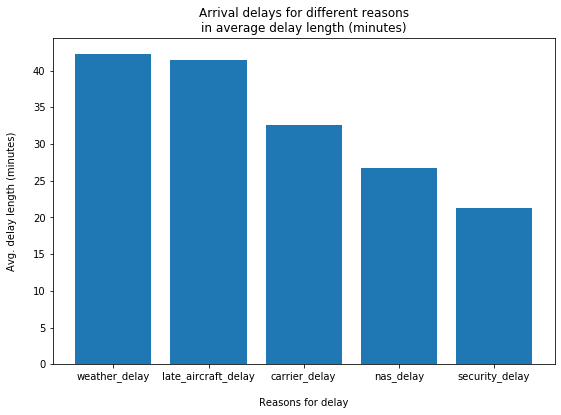

In [25]:
# then I will plot these in a bar graph to compare
locations = [0, 1, 2, 3, 4] # 5 bars in total
heights = sorted([carrier_avg_min, weather_avg_min, nas_avg_min, security_avg_min, late_avg_min], reverse=True)
# I want the bars to be sorted descending, meaning the delay with the largest average delay length first
labels = ['weather_delay', 'late_aircraft_delay', 'carrier_delay', 'nas_delay', 'security_delay']
# first I printed the sorted heights to see which order the labels should be in, then ordered the labels as such
width = 9
height = 6 # I want a nice big graph for this

plt.figure(figsize=(width, height))
plt.bar(locations, heights, tick_label=labels)
plt.title("Arrival delays for different reasons\nin average delay length (minutes)")
plt.xlabel("\nReasons for delay")
plt.ylabel("Avg. delay length (minutes)\n");

## Correlations between arrival delays and delay types

> This heat map looks at the correlation coeffecients between arrival delays and delay types, and shows that the strongest positive relationships for arrival delay are with late aircraft delay, and then carrier delay. The weakest relationships are also negative ones, between different delay reasons, such as between security and carrier delays.

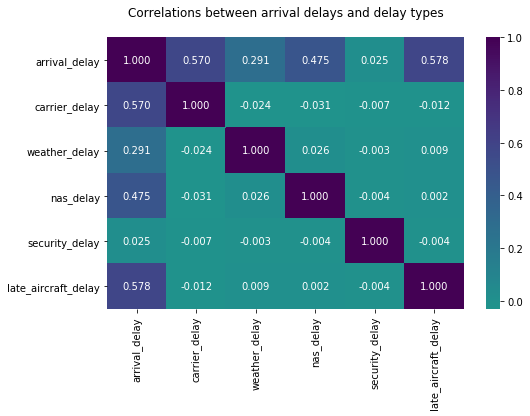

In [23]:
numeric_vars = ['arrival_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize = [8, 5])
sb.heatmap(df_2005_clean_delayed_arrival[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title("Correlations between arrival delays and delay types\n")
plt.show()

## Arrival delays in minutes based on day of the week

>In the next graph, I dove deeper into the relationship not only between arrival delays and delay reasons, but also between these 2 variables and day of the week. I found that there are certain types of delay more often on certain days of the week than on others. The resulting graph is made from a sample of the total dataset, and shows the breakdown of arrival delays by day of the week, based on delay reason. Error bars are included on both graph as we are sampling and mean delay minutes are shown in the graph, meaning there is margin for error.<br><br>Late aircraft delays appear to be the most significant delay on all days except for Wednesday and Saturday. NAS delays and carrier delays then follow, with NAS delays beating out carrier delays more often for arrival delays than departure delays. When looking on a day by day basis like this, it looks like generally, delays are quite short, less than 13 minutes, at least in this current sample. It is helpful to break down these variables into smaller chunks to really zoom in on the data, as based on graphs above, it seemed that delays were frequently longer.

In [14]:
delay_reasons = ['day_of_week', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
multi_bar_arr = df_2005_clean_delayed_arrival[delay_reasons]
multi_bar_dep = df_2005_clean_delayed_departure[delay_reasons] # first I select the columns I want to compare

arrival_multi_bar = pd.melt(multi_bar_arr, id_vars="day_of_week", var_name="delay_reason", value_name="arrival_delay")
departure_multi_bar = pd.melt(multi_bar_dep, id_vars="day_of_week", var_name="delay_reason", value_name="departure_delay")
# I melt the delay columns into a single column, delay reason, with the value arrival_delay in order to build the chart.

arrival_multi_bar_sample = arrival_multi_bar.sample(n=100000)
departure_multi_bar_sample = departure_multi_bar.sample(n=100000) # I will use a sample of 100,000 here

In [15]:
def number_to_weekdays(df): # here I am using a function to apply the day names to the day of the week column
    week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
    df['day_of_week'] = df['day_of_week'].apply(lambda x: week_days[x - 1]) # I use x-1 as the indexing starts with 0
    return df

arrival_multi_bar_sample = number_to_weekdays(arrival_multi_bar_sample) # I apply this to the dfs
departure_multi_bar_sample = number_to_weekdays(departure_multi_bar_sample)

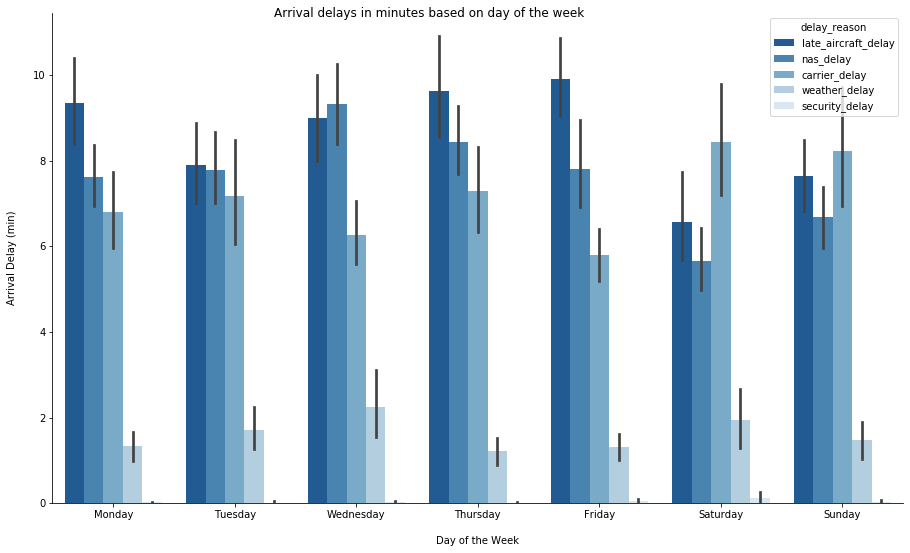

In [16]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
# I want the bars to be in order from Monday-Sunday
plot = sb.catplot(x='day_of_week', y='arrival_delay', hue='delay_reason', hue_order=['late_aircraft_delay', 'nas_delay', 'carrier_delay', 'weather_delay', 'security_delay'], 
                  legend_out=False, data=arrival_multi_bar_sample, kind='bar', order=x_marker, palette = 'Blues_r')
# I want the day of the week on the x, the delay reason to be the hue, I set the hue order, indicate I want the legend
# on my graph (not separate) and use blue reversed color palette 
plot.fig.suptitle('Arrival delays in minutes based on day of the week')
plot.set_axis_labels('\nDay of the Week', 'Arrival Delay (min)\n')
plot.fig.set_figwidth(14)
plot.fig.set_figheight(8) # I want a nice large graph as I am showing lots of information